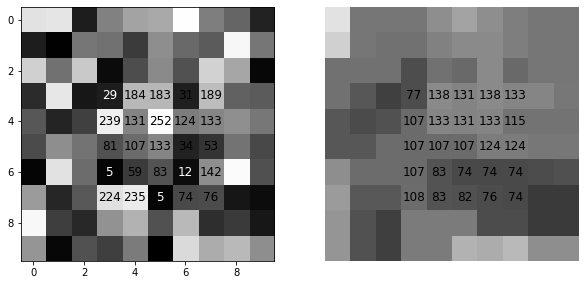

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters.rank import median

img_size = 10

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

np.random.seed(12345)
img = np.random.choice(range(255), (img_size, img_size)).astype(np.uint8)

ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)

for r in range(3, 8):
    for c in range(3, 8):
        clr = "white"
        if img[r, c] > 30:
            clr = "black"
        ax[0].text(c, r, str(img[r, c]), ha='center', va='center',
                 color=clr, fontsize=12)

img_median = median(img, selem=np.ones((3, 3)))

ax[1].imshow(img_median, cmap="gray", vmin=0, vmax=255)

for r in range(3, 8):
    for c in range(3, 8):
        clr = "white"
        if img_median[r, c] > 30:
            clr = "black"
        ax[1].text(c, r, str(img_median[r, c]), ha='center', va='center',
                 color=clr, fontsize=12)

plt.axis('off')
plt.show()


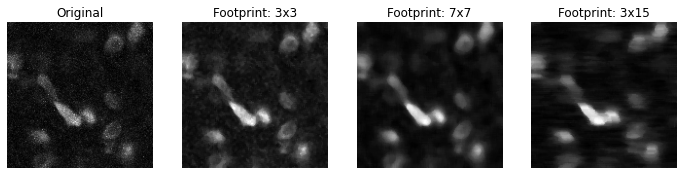

In [17]:
from skimage.io import imread
from skimage.filters.rank import median

img = imread("pitcells2.tif")
img = img[250:400, 200:350]
fig, ax = plt.subplots(1, 4, figsize = (12, 3))

ax[0].imshow(img, cmap = "gray")
img_median = median(img, selem=np.ones((3, 3)))
ax[1].imshow(img_median, cmap="gray")
img_median = median(img, selem=np.ones((7, 7)))
ax[2].imshow(img_median, cmap="gray")
img_median = median(img, selem=np.ones((3, 15)))
ax[3].imshow(img_median, cmap="gray")

titles = ["Original", "Footprint: 3x3", "Footprint: 7x7", "Footprint: 3x15"]
for a in ax:
    a.set_title(titles.pop(0))
    a.axis("off")

plt.show()


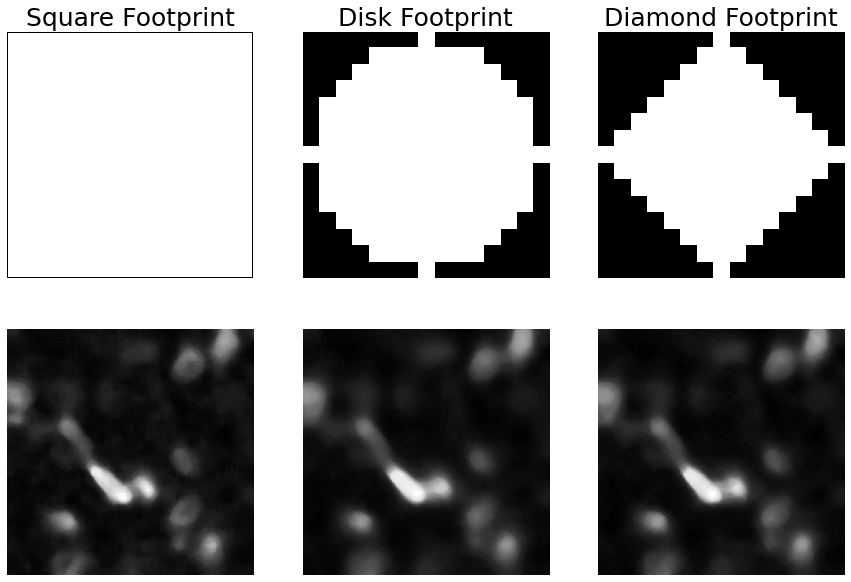

In [56]:
from skimage.morphology import disk, diamond
from matplotlib.patches import Rectangle

sq = np.ones((7,7)) # A square footprint with side 7
dsk = disk(7) # A disk footprint with radius 7
dia = diamond(7) # A diamond footprint with radius 7

img_sq = median(img, selem=sq)
img_disk = median(img, selem=dsk)
img_diamond = median(img, selem=dia)

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0,0].imshow(sq, cmap="gray", vmin=0, vmax=1)
ax[0,1].imshow(dsk, cmap="gray")
ax[0,2].imshow(dia, cmap="gray")
ax[1,0].imshow(img_sq, cmap="gray")
ax[1,1].imshow(img_disk, cmap="gray")
ax[1,2].imshow(img_diamond, cmap="gray")

titles = ["Square Footprint", "Disk Footprint", "Diamond Footprint"]

for i in range(3):
    ax[0,i].set_title(titles[i], fontsize=25)

ax[0,0].add_patch(Rectangle((-0.5, -0.5), 6.95, 6.95, edgecolor="black", fill=False))
for a in ax.ravel():
    a.axis("off")

plt.show()

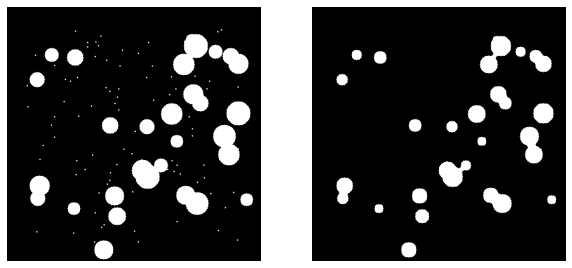

In [88]:
from skimage.filters.rank import minimum

img = np.zeros((400,400), dtype=np.uint8)
np.random.seed(12345)
num_cells = 30

for i in range(num_cells):
    cx, cy = np.random.choice(range(30, 370), 2)
    radius = np.random.choice(range(10, 20))
    img[cx:(cx+radius*2+1), cy:(cy+radius*2+1)] += disk(radius)

# Bright spots
num_spots = 100

for i in range(num_spots):
    cx, cy = np.random.choice(range(30, 370), 2)
    img[cx:(cx+2), cy:(cy+2)] = 1

img = np.clip(img, 0, 1)
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(img, cmap='gray')
ax[1].imshow(minimum(img, selem=disk(3)), cmap='gray')

for a in ax:
    a.axis('off')

plt.show()

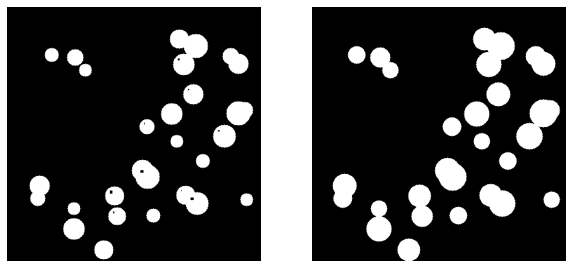

In [110]:
from skimage.filters.rank import maximum

img = np.zeros((400,400), dtype=np.uint8)
np.random.seed(12345)
num_cells = 30

for i in range(num_cells):
    cx, cy = np.random.choice(range(30, 370), 2)
    dia = np.random.choice(range(10, 20))
    img[cx:(cx+dia*2+1), cy:(cy+dia*2+1)] += disk(dia)
    if i % 3 == 0:
        spot_dia = np.random.choice(range(1, 5))
        img[(cx+dia//2):(cx+dia//2+spot_dia+1), (cy+radius//2):(cy+dia//2+spot_dia+1)] = 0

img = np.clip(img, 0, 1)
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].imshow(img, cmap='gray')
ax[1].imshow(maximum(img, selem=disk(3)), cmap='gray')

for a in ax:
    a.axis('off')

plt.show()

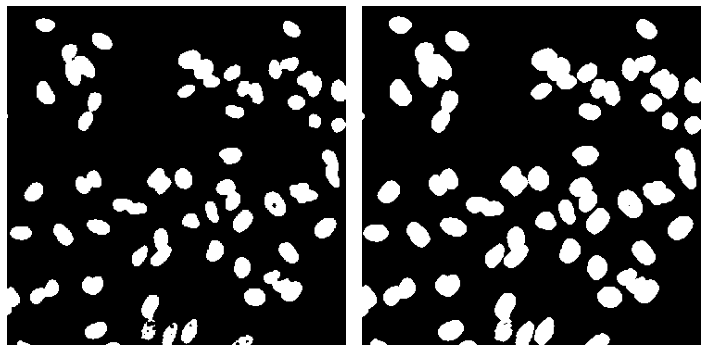

In [123]:
nuclei = imread("nuclei1.tif")
nuclei = nuclei > 150
nuclei = nuclei.astype(np.uint8)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(nuclei, cmap="gray")
ax[1].imshow(maximum(nuclei, selem = disk(2)), cmap="gray")

for a in ax:
    a.axis("off")

fig.tight_layout()

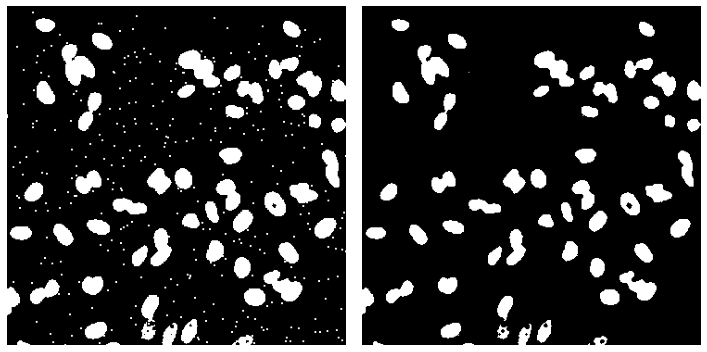

In [127]:
num_spots = 100

for i in range(num_spots):
    cx, cy = np.random.choice(range(5, 370), 2)
    nuclei[cx:(cx+2), cy:(cy+2)] = 1

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(nuclei, cmap="gray")
ax[1].imshow(minimum(nuclei, selem = disk(1)), cmap="gray")

for a in ax:
    a.axis("off")

fig.tight_layout()